Data Imports


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

compact_result_season = pd.read_csv('./data/DataFiles/RegularSeasonCompactResults.csv')


In [2]:
compact_result_season.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0

In [3]:
compact_result_season.Season.describe()

count    150684.000000
mean       2002.127107
std           9.508740
min        1985.000000
25%        1994.000000
50%        2003.000000
75%        2010.000000
max        2017.000000
Name: Season, dtype: float64

In [4]:
#import the file with team IDs
team_ids = pd.read_csv('./data/DataFiles/Teams.csv')
team_ids.head()

TeamID     TeamName  FirstD1Season  LastD1Season
0    1101  Abilene Chr           2014          2018
1    1102    Air Force           1985          2018
2    1103        Akron           1985          2018
3    1104      Alabama           1985          2018
4    1105  Alabama A&M           2000          2018

In [5]:
#alabama = teamid 1104
bama_wins = compact_result_season.loc[compact_result_season['WTeamID'] == 1104]
bama_loss = compact_result_season.loc[compact_result_season['LTeamID'] == 1104]

In [6]:
bama_wins.shape

(628, 8)

In [7]:
bama_loss.shape

(380, 8)

Groupby command to pull up wins

In [8]:
wins_mat = compact_result_season.groupby('WTeamID').size().to_frame()
loss_mat = compact_result_season.groupby('LTeamID').size().to_frame()

In [9]:
simplee_prop = (wins_mat)/(wins_mat+loss_mat)

In [10]:
simplee_prop.columns=['Win_prop']

In [11]:
simplee_prop

Win_prop
WTeamID          
1101     0.267327
1102     0.366246
1103     0.575822
1104     0.623016
1105     0.380252
1106     0.453107
1107     0.497248
1108     0.347486
1109     0.248521
1110     0.458511
1111     0.462389
1112     0.764532
1113     0.509278
1114     0.546809
1115     0.278182
1116     0.641026
1117     0.496746
1118     0.222222
1119     0.328142
1120     0.507231
1121     0.274286
1122     0.479055
1123     0.529851
1124     0.514408
1125     0.641651
1126     0.332265
1127     0.352442
1128     0.632075
1129     0.576923
1130     0.509664
...           ...
1435     0.582915
1436     0.541314
1437     0.648968
1438     0.599593
1439     0.513292
1440     0.334115
1441     0.367647
1442     0.359122
1443     0.603696
1444     0.498416
1445     0.242991
1446     0.291667
1447     0.472103
1448     0.566905
1449     0.530444
1450     0.443266
1451     0.570312
1452     0.615935
1453     0.561105
1454     0.488975
1455     0.580612
1456     0.381522
1457     0.503008
1458     0.629442
1459     0.426446
1460     0.521587
1461     0.533898
1462     0.710526
1463     0.473441
1464     0.332207

[364 rows x 1 columns]

In [12]:
simplee_prop.sort_values('Win_prop', ascending=False)

Win_prop
WTeamID          
1242     0.811707
1181     0.807252
1246     0.768635
1112     0.764532
1314     0.754554
1393     0.737561
1211     0.728512
1462     0.710526
1272     0.694336
1424     0.691849
1257     0.688109
1163     0.687810
1277     0.686687
1158     0.685259
1328     0.684685
1417     0.684685
1153     0.678287
1293     0.667394
1396     0.664688
1228     0.661779
1196     0.659427
1345     0.656313
1307     0.654000
1207     0.653403
1400     0.653202
1140     0.650301
1437     0.648968
1231     0.647705
1125     0.641651
1116     0.641026
...           ...
1119     0.328142
1224     0.324814
1306     0.319310
1366     0.318735
1410     0.316279
1363     0.315158
1154     0.312941
1312     0.311475
1415     0.310112
1302     0.310000
1212     0.294118
1446     0.291667
1115     0.278182
1121     0.274286
1101     0.267327
1244     0.267045
1170     0.262700
1271     0.260065
1341     0.251126
1134     0.250000
1109     0.248521
1342     0.243056
1445     0.242991
1188     0.238298
1146     0.234114
1255     0.233871
1152     0.232662
1118     0.222222
1327     0.136364
1289     0.125000

[364 rows x 1 columns]

In [13]:
simplee_prop['TeamID'] = simplee_prop.index

In [18]:
merged_with_ids = pd.merge(simplee_prop, team_ids)

In [37]:
sorted_wins =merged_with_ids.sort_values('Win_prop', ascending=False)


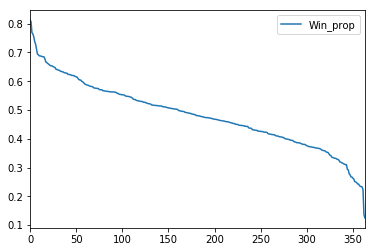

In [42]:
plot1 = sorted_wins.reset_index().plot(y= 'Win_prop', use_index = True)
plt.show()

In [45]:
train_reg, test_reg = train_test_split(sorted_wins)

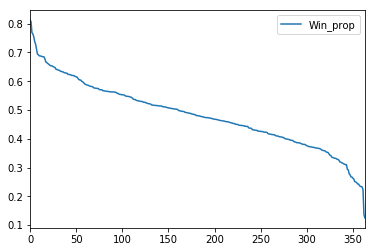

In [48]:
train_reg_sort = sorted_wins.sort_values('Win_prop', ascending=False)
plot2 = train_reg_sort.reset_index().plot(y= 'Win_prop', use_index = True)
plt.show()

In [49]:
train_reg_sort

Win_prop  TeamID        TeamName  FirstD1Season  LastD1Season
141  0.811707    1242          Kansas           1985          2018
80   0.807252    1181            Duke           1985          2018
145  0.768635    1246        Kentucky           1985          2018
11   0.764532    1112         Arizona           1985          2018
213  0.754554    1314  North Carolina           1985          2018
292  0.737561    1393        Syracuse           1985          2018
110  0.728512    1211         Gonzaga           1985          2018
361  0.710526    1462          Xavier           1985          2018
171  0.694336    1272         Memphis           1985          2018
323  0.691849    1424            UNLV           1985          2018
156  0.688109    1257      Louisville           1985          2018
62   0.687810    1163     Connecticut           1985          2018
176  0.686687    1277     Michigan St           1985          2018
57   0.685259    1158  Col Charleston           1992          2018
227  0.684685    1328        Oklahoma           1985          2018
316  0.684685    1417            UCLA           1985          2018
52   0.678287    1153      Cincinnati           1985          2018
192  0.667394    1293       Murray St           1985          2018
295  0.664688    1396          Temple           1985          2018
127  0.661779    1228        Illinois           1985          2018
95   0.659427    1196         Florida           1985          2018
244  0.656313    1345          Purdue           1985          2018
206  0.654000    1307      New Mexico           1985          2018
106  0.653403    1207      Georgetown           1985          2018
299  0.653202    1400           Texas           1985          2018
39   0.650301    1140             BYU           1985          2018
336  0.648968    1437       Villanova           1985          2018
130  0.647705    1231         Indiana           1985          2018
24   0.641651    1125         Belmont           2000          2018
15   0.641026    1116        Arkansas           1985          2018
..        ...     ...             ...            ...           ...
18   0.328142    1119            Army           1985          2018
123  0.324814    1224          Howard           1985          2018
205  0.319310    1306   New Hampshire           1985          2018
265  0.318735    1366     Savannah St           2003          2018
309  0.316279    1410           UTRGV           1985          2018
262  0.315158    1363     San Jose St           1985          2018
53   0.312941    1154         Citadel           1985          2018
211  0.311475    1312            NJIT           2007          2018
314  0.310112    1415    UC Riverside           2002          2018
201  0.310000    1302     NE Illinois           1991          1998
111  0.294118    1212       Grambling           1985          2018
345  0.291667    1446     W Texas A&M           1985          1986
14   0.278182    1115  Ark Pine Bluff           1999          2018
20   0.274286    1121         Augusta           1985          1991
0    0.267327    1101     Abilene Chr           2014          2018
143  0.267045    1244        Kennesaw           2006          2018
69   0.262700    1170   CS Sacramento           1992          2018
170  0.260065    1271      MD E Shore           1985          2018
240  0.251126    1341    Prairie View           1985          2018
33   0.250000    1134        Brooklyn           1985          1992
8    0.248521    1109    Alliant Intl           1985          1991
241  0.243056    1342    Presbyterian           2008          2018
344  0.242991    1445      W Salem St           2007          2010
87   0.238298    1188    Edwardsville           2009          2018
45   0.234114    1146   Cent Arkansas           2007          2018
154  0.233871    1255        Longwood           2005          2018
51   0.232662    1152      Chicago St           1985          2018
17   0.222222    1118    Armstrong St           1987

In [53]:
compact_result_season[compact_result_season['WTeamID']==1228]

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0         1985      20     1228      81     1328      64    N      0
6         1985      25     1228      64     1226      44    N      0
53        1985      27     1228      75     1332      72    N      3
106       1985      30     1228      81     1152      63    H      0
199       1985      33     1228      73     1328      70    H      0
367       1985      38     1228      65     1281      50    N      0
387       1985      39     1228      72     1162      48    H      0
437       1985      40     1228      93     1308      55    H      0
629       1985      47     1228      83     1354      47    H      0
722       1985      50     1228      87     1153      65    N      0
1413      1985      73     1228      64     1276      58    H      0
1494      1985      75     1228      75     1277      63    H      0
1689      1985      80     1228      78     1458      67    A      0
1775      1985      82     1228      55     1321      43    A      0
1926      1985      86     1228      84     1326      66    H      0
2137      1985      90     1228      52     1231      41    H      0
2430      1985      97     1228      77     1222      76    A      0
2831      1985     108     1228      64     1321      42    H      0
2917      1985     110     1228      68     1458      49    H      0
3112      1985     115     1228      66     1231      50    A      0
3470      1985     124     1228      86     1345      43    H      0
3646      1985     129     1228      59     1234      53    H      0
3714      1985     131     1228      82     1278      56    H      0
3837      1986      29     1228      95     1260      64    H      0
4073      1986      37     1228      84     1453      34    H      0
4136      1986      39     1228      79     1184      56    H      0
4192      1986      40     1228     115     1429      64    H      0
4401      1986      47     1228     102     1222      92    H      0
4585      1986      54     1228      67     1281      55    N      0
4668      1986      56     1228      91     1224      65    H      0
...        ...     ...      ...     ...      ...     ...  ...    ...
140665    2016      25     1228      72     1412      58    N      0
141043    2016      33     1228      80     1441      68    H      0
141211    2016      37     1228      69     1463      65    H      0
141275    2016      40     1228      83     1227      79    N      0
141527    2016      47     1228      91     1377      79    H      0
141764    2016      51     1228      68     1281      63    N      0
142449    2016      69     1228      84     1345      70    H      0
142998    2016      82     1228      76     1278      71    A      1
143520    2016      93     1228     110     1353     101    A      3
144155    2016     106     1228      82     1353      66    H      0
144766    2016     118     1228      84     1278      71    H      0
145132    2016     128     1228      85     1278      52    N      0
145172    2016     129     1228      68     1234      66    N      0
145324    2017      11     1228      81     1369      62    H      0
145433    2017      13     1228      79     1297      64    H      0
145665    2017      18     1228      89     1178      69    H      0
146248    2017      29     1228      88     1301      74    H      0
146431    2017      33     1228      64     1433      46    N      0
146561    2017      36     1228      85     1237      77    H      0
146700    2017      40     1228      92     1141      73    H      0
146906    2017      47     1228      75     1140      73    N      0
147111    2017      51     1228      75     1281      66    N      0
147478    2017      62     1228      75     1326      70    H      0
147904    2017      72     1228      85     1276      69    H      0
148571    2017      86     1228      76     1234      64    H      0
149203    2017      99     1228      68     1321      61    A      0
149713